**Linear Regression Model**

📊 Logistic Regression Evaluation
Accuracy: 0.7000
F1 Score: 0.6786
AUC Score: 0.7544
Confusion Matrix:
[[23  7]
 [11 19]]


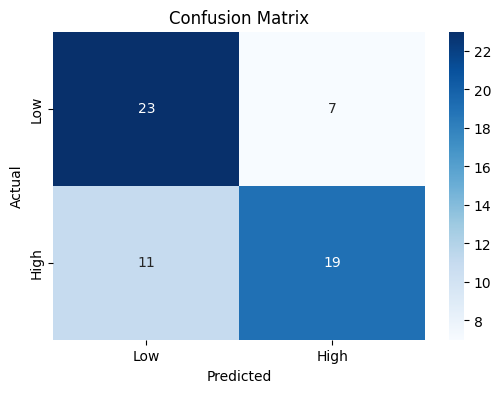

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Project-Management-2.csv")

# Data preparation
df['Start Date'] = pd.to_datetime(df['Start Date'], dayfirst=True, errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], dayfirst=True, errors='coerce')
df['Duration Days'] = (df['End Date'] - df['Start Date']).dt.days
df['Delay'] = df['Project Status'].apply(lambda x: 1 if x == 'Behind' else 0)
df['Budget Deviation'] = df['Budget'] - df['Actual Cost']
df['Resource Usage Ratio'] = df.apply(lambda row: row['Hours Spent'] / row['Duration Days'] if row['Duration Days'] > 0 else None, axis=1)

# Drop rows with missing values
df = df.dropna()

# Feature matrix
X = df[['Budget', 'Actual Cost', 'Progress', 'Delay', 'Budget Deviation']]

# Convert target to binary classification (High or Low Resource Usage)
threshold = df['Resource Usage Ratio'].median()  # You can change this threshold
df['Resource Usage Classification'] = (df['Resource Usage Ratio'] >= threshold).astype(int)

# Target for classification
y = df['Resource Usage Classification']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Logistic Regression (as a classifier)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_proba = lr_model.predict_proba(X_test)[:, 1]  # probability for positive class
auc = roc_auc_score(y_test, y_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the results
print("📊 Logistic Regression Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")
print("Confusion Matrix:")
print(cm)

# Plotting the Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
# --- After Linear Regression evaluation ---
rmse_lr = rmse
r2_lr = r2
accuracy_lr = accuracy
f1_lr = f1
auc_lr = auc


**SVR**

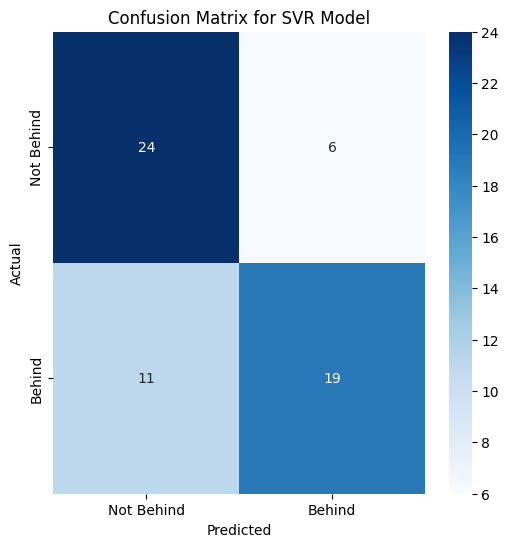

📊 Support Vector Regression (SVR) Evaluation
RMSE: 0.4822
R² score: 0.0698
Accuracy: 0.7167
F1 Score: 0.6909
AUC Score: 0.7533


In [11]:

# Model: Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test)

# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# For AUC, accuracy, and F1 score, we need to convert predictions to binary labels
# (since SVR is a regression model, it predicts continuous values)

# Convert continuous predictions to binary based on a threshold (e.g., 0.5 or a custom threshold)
threshold = 0.5
y_pred_binary = (y_pred_svr > threshold).astype(int)

# Binarize true labels for evaluation
lb = LabelBinarizer()
y_true_binary = lb.fit_transform(y_test.values.reshape(-1, 1))

# Calculate metrics
accuracy_svr = accuracy_score(y_true_binary, y_pred_binary)
f1_svr = f1_score(y_true_binary, y_pred_binary)
auc_svr = roc_auc_score(y_true_binary, y_pred_svr)  # AUC works directly with continuous predictions

# Confusion Matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Behind', 'Behind'], yticklabels=['Not Behind', 'Behind'])
plt.title('Confusion Matrix for SVR Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Displaying the results
print("📊 Support Vector Regression (SVR) Evaluation")
print(f"RMSE: {rmse_svr:.4f}")
print(f"R² score: {r2_svr:.4f}")
print(f"Accuracy: {accuracy_svr:.4f}")
print(f"F1 Score: {f1_svr:.4f}")
print(f"AUC Score: {auc_svr:.4f}")


In [16]:
# --- After SVR evaluation ---
rmse_svr = rmse_svr
r2_svr = r2_svr
accuracy_svr = accuracy_svr
f1_svr = f1_svr
auc_svr = auc_svr


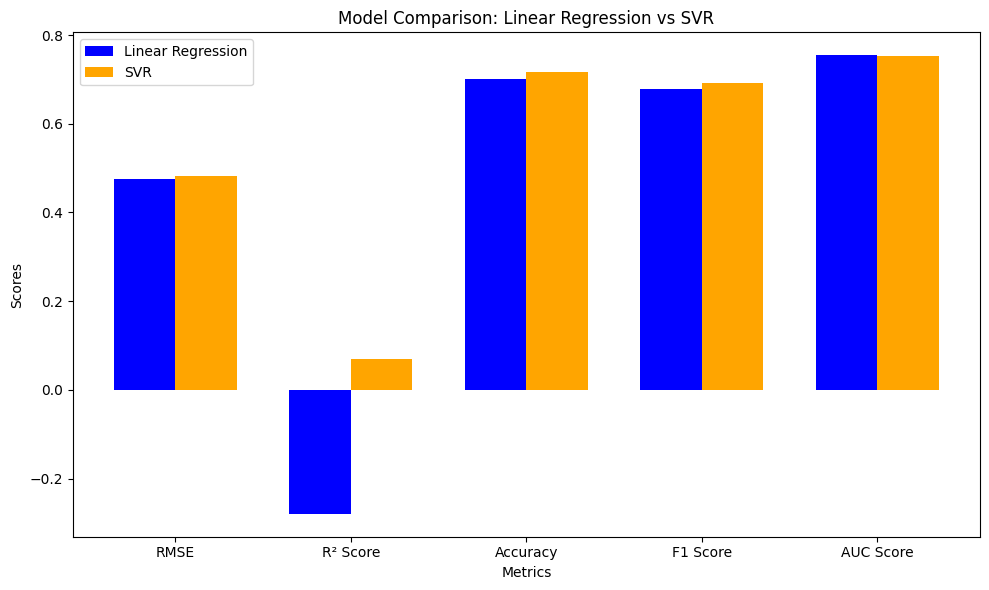

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for comparison
metrics = ['RMSE', 'R² Score', 'Accuracy', 'F1 Score', 'AUC Score']
linear_regression = [rmse_lr, r2_lr, accuracy_lr, f1_lr, auc_lr]
svr = [rmse_svr, r2_svr, accuracy_svr, f1_svr, auc_svr]

# Set figure size and position
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width and positions
bar_width = 0.35
index = np.arange(len(metrics))

# Plotting the bars
bar1 = ax.bar(index, linear_regression, bar_width, label='Linear Regression', color='blue')
bar2 = ax.bar(index + bar_width, svr, bar_width, label='SVR', color='orange')

# Adding labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Linear Regression vs SVR')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()
